In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
from scipy.optimize import minimize

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/bike.csv")
df = pd.read_csv("log_ref_timing.csv")

df

,Ref_Format,Video_Format,H_Timing,V_Timing
0,1080i5994,1080i5994,0.93,0 line
1,720p5994,1080i5994,1.28,0 line
2,525i5994,1080i5994,0.06,0 line
3,1080i5994,720p5994,0.93,0 line
4,720p5994,720p5994,1.22,0 line
...,...,...,...,...
233,720p5000,1080p5000,8.79,0 line
234,625i5000,1080p5000,3.97,44 lines advanced
235,1080i5000,625i5000,1.25,0 line
236,720p5000,625i5000,1.11,0 line


In [60]:
tbl = df.groupby(["Ref_Format", "Video_Format"], as_index = False)["H_Timing"].aggregate(np.mean)

idxb = tbl["Ref_Format"].str.match(r"^525i5994")

tbl.loc[idxb]

df525 = df["Ref_Format"].str.match(r"^525i5994")
df.loc[df525]

tbl.loc[idxb]

,Ref_Format,Video_Format,H_Timing
8,525i5994,1080i5994,0.314
9,525i5994,1080p5994,1.002
10,525i5994,525i5994,2.654
11,525i5994,720p5994,0.256


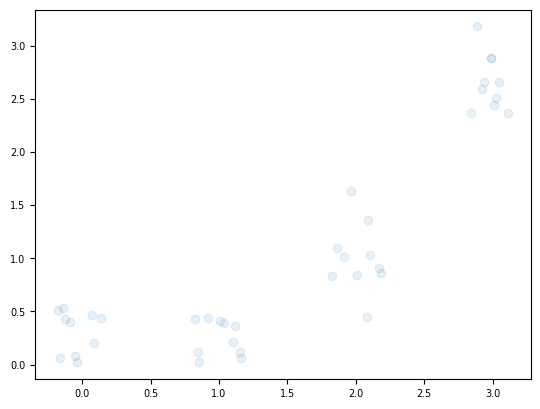

In [70]:
grpints = pd.factorize(df["Video_Format"])

df525index = df["Ref_Format"].str.match(r"^525i5994")
df525 = df.loc[df525index]

N = df525.shape[0]

grpints525 = pd.factorize(df525["Video_Format"])

plt.scatter(grpints525[0] + np.random.uniform(-0.2, 0.2, size = N),
            df525["H_Timing"], alpha = 0.1)

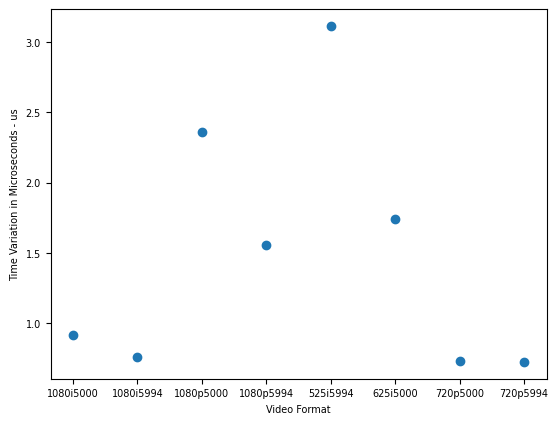

In [11]:
plt.scatter(np.unique(df["Video_Format"]), tbl.values)
plt.xlabel("Video Format");
plt.ylabel("Time Variation in Microseconds - us");

# plt.scatter(np.unique(df["weekday"]), tbl.values)
# plt.xlabel("Weekday");
# plt.ylabel("Mean number of bikes rented");

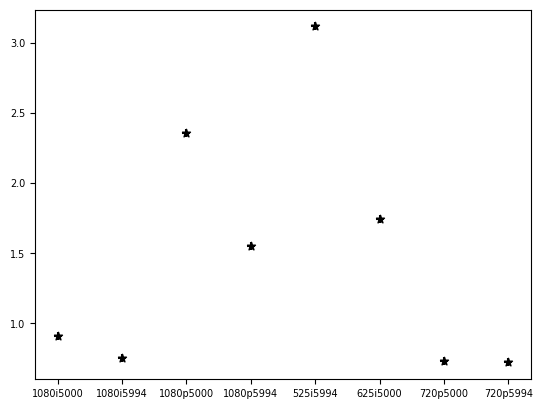

In [12]:
N = df.shape[0]

#plt.scatter(df["Video_Format"] + np.random.uniform(-0.2, 0.2, size = N), df["H_Timing"], c = "orange", alpha = 0.5)
#plt.scatter(df["Video_Format"] + np.random.uniform(-0.2, 0.2, size = N), df["H_Offset"], alpha = 0.1)
plt.scatter(np.unique(df["Video_Format"]), tbl.values,
           marker = "*", c = "black")

# N = df.shape[0]
# plt.scatter(df["weekday"] + np.random.uniform(-0.2, 0.2, size = N),
#             df["cnt"], alpha = 0.1)

plt.scatter(np.unique(df["Video_Format"]), tbl.values, marker = "+", c = "black")
#N

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

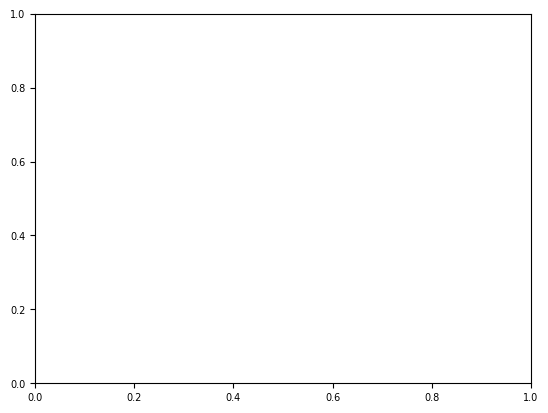

In [15]:
df.boxplot(column = "Video_Format", by="H_Timing");
plt.scatter(np.unique(df["H_Timing"]), tbl.values)
plt.xlabel("Weekday");
plt.ylabel("Mean number of bikes rented");


In [17]:
X = [np.asarray(df["H_Timing"] == d) for d in np.unique(df["H_Timing"])];
X = np.transpose(np.asarray(X));
X = np.c_[X[:, 1:]];
